In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

# Data Generation
# np.random.seed(1234)
n = 100
X = np.linspace(0,10,n)
X = np.reshape(X, (-1, 1))

f_true = lambda x: -np.cos(np.pi * x) + np.sin(4. * np.pi * x)
Y = f_true(X)  # Training outputs

# ======== everything above is in a black-box, we only know X, Y ========

In [2]:
import chaospy as cp
# Define the range of the input
q_pce = cp.Uniform(0, 10)

# Create an orthogonal polynomial basis
degree = 10  # Degree of the polynomial
polynomials_pce = cp.orth_ttr(degree, q_pce)

# Fit the PCE model to the data
pce_model_cp = cp.fit_regression(polynomials_pce, X.flatten(), Y.flatten())

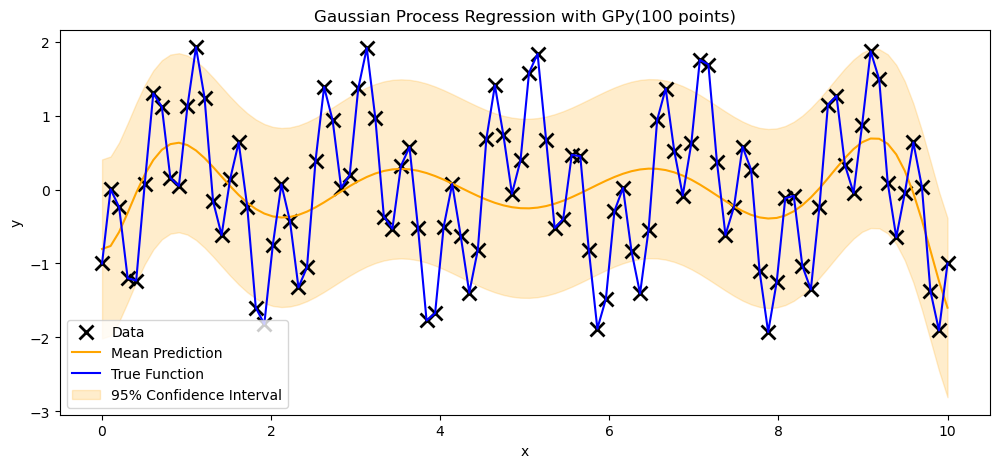

In [3]:
# Predict at new data points
X_new = np.linspace(0, 10, 100).reshape(-1, 1)  # Test inputs
Y_pred = pce_model_cp(X_new)
Y_var = np.sqrt(cp.Var(pce_model_cp, q_pce))

Y_true = np.array([f_true(xn) for xn in X_new])


# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X, Y, 'kx', markersize=10, markeredgewidth=2, label="Data")

plt.plot(X_new, Y_pred, label='Mean Prediction', color='orange')
plt.plot(X_new, Y_true, label="True Function", color="blue")
plt.fill_between(X_new.flatten(), (Y_pred - 2*np.sqrt(Y_var)).flatten(), (Y_pred + 2*np.sqrt(Y_var)).flatten(), color='orange',
                 alpha=0.2, label='95% Confidence Interval')
plt.title(f"Gaussian Process Regression with GPy({n} points)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
fig_name = f"c1_pce_{n}p{degree}d"
plt.savefig('figs/'+fig_name)
plt.show()
